# rho stats

In [2]:
# load catalogs
import pyfits as pf
# load catalogs
import pickle
def save_obj(name, obj):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, protocol=3)
        
def load_obj(name):
        try:
            with open(name + '.pkl', 'rb') as f:
                return pickle.load(f)#, encoding='latin1')
        except:
            with open(name + '.pkl', 'rb') as f:
                return pickle.load(f, encoding='latin1')


            
import pickle
def save_obj(name, obj):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, protocol=3)
        
def load_obj(name):
        try:
            with open(name + '.pkl', 'rb') as f:
                return pickle.load(f)#, encoding='latin1')
        except:
            with open(name + '.pkl', 'rb') as f:
                return pickle.load(f, encoding='latin1')


import numpy as np
#save_obj('/global/cfs/cdirs/des/mgatti/BFD_CAT_V1',catalog)

import pyfits as pf
import gc
m = pf.open('/global/cfs/cdirs/des/schutt20/catalogs/y6a2_piff_v3_allres_v3_collated.fits')
ras = m[1].data['RA']
decs = m[1].data['DEC']

p1 = m[1].data['G1_MODEL']
p2 = m[1].data['G2_MODEL']
q1 = m[1].data['G1_DATA']-m[1].data['G1_MODEL']
q2 = m[1].data['G2_DATA']-m[1].data['G2_MODEL']
w1 = m[1].data['G1_DATA']*(m[1].data['T_DATA']-m[1].data['T_MODEL'])/m[1].data['T_DATA']
w2 = m[1].data['G2_DATA']*(m[1].data['T_DATA']-m[1].data['T_MODEL'])/m[1].data['T_DATA']
del m
gc.collect()

import treecorr



Nbins = 20

min_theta = 2.5/60.
max_theta = 250./60.
number_of_cores = 64
bin_slope = 0.05


conf = {'nbins': Nbins,
            'min_sep': min_theta,
            'max_sep': max_theta,
            'sep_units': 'degrees',
            'bin_slop': bin_slope,
            'nodes': number_of_cores  # parameter for treecorr
            }
import treecorr

cat_p = treecorr.Catalog(ra=ras, dec=decs, g1=p1-np.mean(p1), g2=p2-np.mean(p2),ra_units='deg', dec_units='deg',npatch=100)
cat_q = treecorr.Catalog(ra=ras, dec=decs, g1=q1-np.mean(q1), g2=q2-np.mean(q2),ra_units='deg', dec_units='deg',npatch=100)
cat_w = treecorr.Catalog(ra=ras, dec=decs, g1=w1-np.mean(w1), g2=w2-np.mean(w2),ra_units='deg', dec_units='deg',npatch=100)
catalog = load_obj('/global/cfs/cdirs/des/mgatti/BFD_CAT_V1')
cat_data = treecorr.Catalog(ra=catalog['ra'], dec=catalog['dec'], g1=catalog['e1']-np.mean(catalog['e1']), g2=catalog['e2']-np.mean(catalog['e2']),ra_units='deg', dec_units='deg',npatch=100)
del catalog
gc.collect()
rho0 = treecorr.GGCorrelation(conf,var_method='jackknife')
rho0.process(cat_p,cat_p)
rho1 = treecorr.GGCorrelation(conf,var_method='jackknife')
rho1.process(cat_q,cat_q)
rho3 = treecorr.GGCorrelation(conf,var_method='jackknife')
rho3.process(cat_w,cat_w)
rho2 = treecorr.GGCorrelation(conf,var_method='jackknife')
rho2.process(cat_q,cat_p)
rho4 = treecorr.GGCorrelation(conf,var_method='jackknife')
rho4.process(cat_q,cat_w)
rho5 = treecorr.GGCorrelation(conf,var_method='jackknife')
rho5.process(cat_p,cat_w)


tau0 = treecorr.GGCorrelation(conf,var_method='jackknife')
tau0.process(cat_data,cat_p)
tau2 = treecorr.GGCorrelation(conf,var_method='jackknife')
tau2.process(cat_data,cat_q)
tau5 = treecorr.GGCorrelation(conf,var_method='jackknife')
tau5.process(cat_data,cat_w)

t = gg.meanr

results = dict()
results['rho0'] = rho0
results['rho1'] = rho1
results['rho2'] = rho2
results['rho3'] = rho3
results['rho4'] = rho4
results['rho5'] = rho5
results['tau0'] = tau0
results['tau2'] = tau2
results['tau5'] = tau5

save_obj('rhostat',results)
#plt.errorbar(t,blinding*t*gg.xip,t*np.sqrt(gg.cov.diagonal())[:20],label = r'$\xi+$')
#plt.errorbar(t,blinding*t*gg.xim,t*np.sqrt(gg.cov.diagonal())[20:],label = r'$\xi-$')
#plt.errorbar(t,0*blinding*t*gg.xip,t*np.sqrt(gg.cov.diagonal())[:20],color='black')
#plt.xscale('log')
#


In [14]:
# load catalogs
def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb
   
#des scheme
colors = ['#601A4A', '#EE442F','#63ACBE']

import pickle
def save_obj(name, obj):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, protocol=3)
        
def load_obj(name):
        try:
            with open(name + '.pkl', 'rb') as f:
                return pickle.load(f)#, encoding='latin1')
        except:
            with open(name + '.pkl', 'rb') as f:
                return pickle.load(f, encoding='latin1')
            
results = load_obj('rhostat')

In [20]:
th = results['rho0'].meanr*60

In [19]:
th

array([0.00687601, 0.0067299 , 0.0065593 , 0.00637395, 0.00616772,
       0.00600619, 0.00587438, 0.00553137, 0.00514634, 0.00479898,
       0.00437168, 0.00400646, 0.00366917, 0.00339833, 0.00327652,
       0.00343382, 0.00363245, 0.00321772, 0.00298832, 0.00303992])

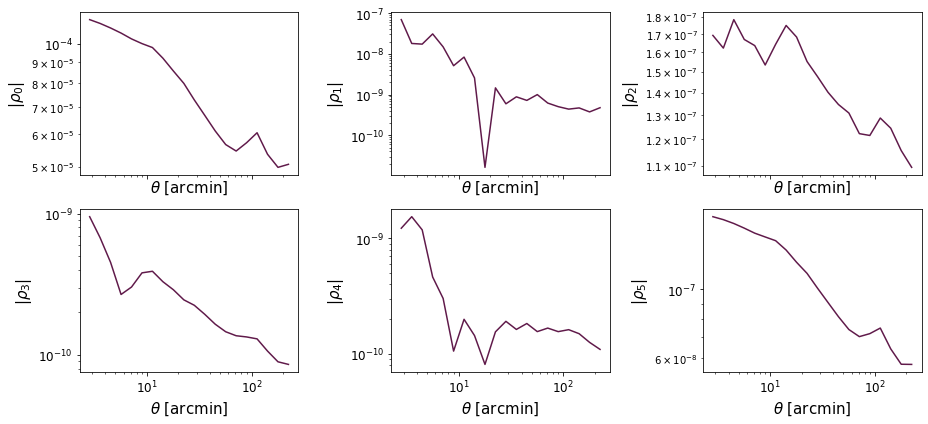

In [28]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(2,3,sharex = True, figsize=(13,6))
ax[0,0].errorbar(th,np.abs(results['rho0'].xip) ,color=colors[0], label = 'Y3')
ax[0,1].errorbar(th,np.abs(results['rho1'].xip) ,color=colors[0], label = 'Y3')
ax[0,2].errorbar(th,np.abs(results['rho2'].xip) ,color=colors[0], label = 'Y3')
ax[1,0].errorbar(th,np.abs(results['rho3'].xip) ,color=colors[0], label = 'Y3')
ax[1,1].errorbar(th,np.abs(results['rho4'].xip) ,color=colors[0], label = 'Y3')
ax[1,2].errorbar(th,np.abs(results['rho5'].xip) ,color=colors[0], label = 'Y3')

ax[0,0].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[0,0].set_ylabel(r'|$\rho_0$|', size = 15)
#ax[0,0].set_title(r'$\rho_0$', size = 20)

ax[0,1].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[0,1].set_ylabel(r'|$\rho_1$|', size = 15)
#ax[0,1].set_title(r'$\rho_1$', size = 20)

ax[0,2].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[0,2].set_ylabel(r'|$\rho_2$|', size = 15)
#ax[0,2].set_title(r'$\rho_2$', size = 20)

ax[1,0].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[1,0].set_ylabel(r'|$\rho_3$|', size = 15)
#ax[1,0].set_title(r'$\rho_3$', size = 20)

ax[1,1].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[1,1].set_ylabel(r'|$\rho_4$|', size = 15)
#ax[1,1].set_title(r'$\rho_4$', size = 20)

ax[1,2].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[1,2].set_ylabel(r'$|\rho_5$|', size = 15)
#ax[1,2].set_title(r'$\rho_5$', size = 20)
#plt.yscale('log')
ax[0,0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[0,1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[0,2].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[1,0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[1,1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[1,2].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax[1,1].tick_params(axis="x", labelsize=12)
ax[1,1].tick_params(axis="y", labelsize=12)
ax[0,1].tick_params(axis="x", labelsize=12)
ax[0,1].tick_params(axis="y", labelsize=12)
ax[1,0].tick_params(axis="x", labelsize=12)
ax[1,0].tick_params(axis="y", labelsize=12)
ax[0,0].tick_params(axis="x", labelsize=12)
ax[0,0].tick_params(axis="y", labelsize=12)
ax[1,2].tick_params(axis="x", labelsize=12)
ax[1,2].tick_params(axis="y", labelsize=12)
ax[0,2].tick_params(axis="x", labelsize=12)
ax[0,2].tick_params(axis="y", labelsize=12)

ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')
ax[0,2].set_yscale('log')
ax[1,0].set_yscale('log')
ax[1,1].set_yscale('log')
ax[1,2].set_yscale('log')

ax[0,0].set_xscale('log')
ax[0,1].set_xscale('log')
ax[0,2].set_xscale('log')
ax[1,0].set_xscale('log')
ax[1,1].set_xscale('log')
ax[1,2].set_xscale('log')
plt.subplots_adjust(wspace=0.005, hspace=0.005)
plt.tight_layout()

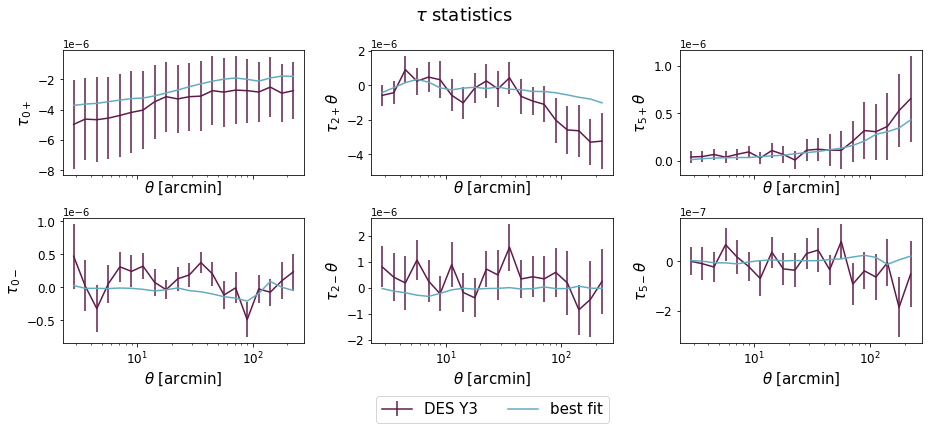

In [80]:
fig, ax = plt.subplots(2,3,sharex = True, figsize=(13,6))






ax[0,0].errorbar(th,results['tau0'].xip,np.sqrt(results['tau0'].cov.diagonal())[:20],color=colors[0], label = 'Y3')
ax[0,1].errorbar(th,results['tau2'].xip*th,np.sqrt(results['tau2'].cov.diagonal())[:20]*th,color=colors[0], label = 'Y3')
ax[0,2].errorbar(th,results['tau5'].xip*th,np.sqrt(results['tau5'].cov.diagonal())[:20]*th,color=colors[0], label = 'Y3')
ax[1,0].errorbar(th,results['tau0'].xim,np.sqrt(results['tau0'].cov.diagonal())[20:],color=colors[0], label = 'Y3')
ax[1,1].errorbar(th,results['tau2'].xim*th,np.sqrt(results['tau2'].cov.diagonal())[20:]*th,color=colors[0], label = 'DES Y3')
ax[1,2].errorbar(th,results['tau5'].xim*th,np.sqrt(results['tau5'].cov.diagonal())[20:]*th,color=colors[0], label = 'Y3')



#ax[0,0].errorbar(dict_save['theta'],dict_save['thp'][0],color=colors[1], label = 'best fit')
#ax[0,1].errorbar(dict_save['theta'],dict_save['thp'][1]*dict_save['theta'],color=colors[1], label = 'best fit')
#ax[0,2].errorbar(dict_save['theta'],dict_save['thp'][2]*dict_save['theta'],color=colors[1], label = 'best fit')
#ax[1,0].errorbar(dict_save['theta'],dict_save['thm'][0],color=colors[1], label = 'best fit')
#ax[1,1].errorbar(dict_save['theta'],dict_save['thm'][1]*dict_save['theta'],color=colors[1], label = 'best fit')
#ax[1,2].errorbar(dict_save['theta'],dict_save['thm'][2]*dict_save['theta'],color=colors[1], label = 'best fit')
#


#if you want to play with numbers a little bit..
# from Andres and from the paper*****
a = -0.038
b = 1.09
c = -0.46

a = -0.037 #0.02 0.02
b = -2.118 #1.01 1.01
c = -5.051 
## from chi2 minimisation
#a = 1.32807034e-03  
#b =   1.09582970e+00
#c = -3.68899533e-04
    
dict_save = dict()
dict_save['thp'] = dict()
dict_save['thp'][0]= a*results['rho0'].xip+b*results['rho2'].xip+c*results['rho5'].xip
dict_save['thp'][1]= a*results['rho2'].xip+b*results['rho1'].xip+c*results['rho4'].xip
dict_save['thp'][2]= a*results['rho5'].xip+b*results['rho4'].xip+c*results['rho3'].xip


ax[0,0].errorbar(th,dict_save['thp'][0],color=colors[2], label = 'best fit')
ax[0,1].errorbar(th,dict_save['thp'][1]*th,color=colors[2], label = 'best fit')
ax[0,2].errorbar(th,dict_save['thp'][2]*th,color=colors[2], label = 'best fit')

dict_save['thm'] = dict()
dict_save['thm'][0]= a*results['rho0'].xim+b*results['rho2'].xim+c*results['rho5'].xim
dict_save['thm'][1]= a*results['rho2'].xim+b*results['rho1'].xim+c*results['rho4'].xim
dict_save['thm'][2]= a*results['rho5'].xim+b*results['rho4'].xim+c*results['rho3'].xim


ax[1,0].errorbar(th,dict_save['thm'][0],color=colors[2], label = 'best fit')
ax[1,1].errorbar(th,dict_save['thm'][1]*th,color=colors[2], label = 'best fit')
ax[1,2].errorbar(th,dict_save['thm'][2]*th,color=colors[2], label = 'best fit')





ax[0,0].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[0,0].set_ylabel(r'$\tau_{0+}$', size = 15)
#ax[0,0].set_title(r'$\tau_{0+}$', size = 20)

ax[0,1].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[0,1].set_ylabel(r'$\tau_{2+}\theta$', size = 15)
#ax[0,1].set_title(r'$\tau_{2+}$', size = 20)

ax[0,2].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[0,2].set_ylabel(r'$\tau_{5+}\theta$', size = 15)
#ax[0,2].set_title(r'$\tau_{5+}$', size = 20)

ax[1,0].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[1,0].set_ylabel(r'$\tau_{0-}$', size = 15)
#ax[1,0].set_title(r'$\tau_{0-}$', size = 20)

ax[1,1].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[1,1].set_ylabel(r'$\tau_{2-}\theta$', size = 15)
#ax[1,1].set_title(r'$\tau_{2-}$', size = 20)

ax[1,2].set_xlabel(r'$\theta$ [arcmin]', size = 15)
ax[1,2].set_ylabel(r'$\tau_{5-}\theta$', size = 15)
#ax[1,2].set_title(r'$\tau_{5-}$', size = 20)
#plt.yscale('log')
ax[0,0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[0,1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[0,2].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[1,0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[1,1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[1,2].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax[1,1].legend(bbox_to_anchor=(0.5, -0.7),ncol = 2,loc='lower center', fontsize=15)

ax[1,1].tick_params(axis="x", labelsize=12)
ax[1,1].tick_params(axis="y", labelsize=12)
ax[0,1].tick_params(axis="x", labelsize=12)
ax[0,1].tick_params(axis="y", labelsize=12)
ax[1,0].tick_params(axis="x", labelsize=12)
ax[1,0].tick_params(axis="y", labelsize=12)
ax[0,0].tick_params(axis="x", labelsize=12)
ax[0,0].tick_params(axis="y", labelsize=12)
ax[1,2].tick_params(axis="x", labelsize=12)
ax[1,2].tick_params(axis="y", labelsize=12)
ax[0,2].tick_params(axis="x", labelsize=12)
ax[0,2].tick_params(axis="y", labelsize=12)
plt.subplots_adjust(wspace=0.00, hspace=0.00)
plt.tight_layout()
plt.suptitle(r'$\tau$ statistics',y=1.05,fontsize=18)
plt.xscale('log')

#plt.savefig('./figures/taus.pdf',bbox_inches='tight')
plt.show()


In [47]:
import emcee

In [61]:
def  model (x):
    a,b,c = x
    dict_data = dict()
    dict_data[0] = results['tau0'].xip
    dict_data[1] = results['tau2'].xip
    dict_data[2] = results['tau5'].xip
    dict_data[3] = results['tau0'].xim
    dict_data[4] = results['tau2'].xim
    dict_data[5] = results['tau5'].xim
    
    dict_cov = dict()
    dict_cov[0] = (results['tau0'].cov)[:20,:][:,:20]
    dict_cov[1] = (results['tau2'].cov)[:20,:][:,:20]
    dict_cov[2] = (results['tau5'].cov)[:20,:][:,:20]
    dict_cov[3] = (results['tau0'].cov)[:,20:][20:,:]
    dict_cov[4] = (results['tau2'].cov)[:,20:][20:,:]
    dict_cov[5] = (results['tau5'].cov)[:,20:][20:,:]
    
    dict_save = dict()
    dict_save[0]= a*results['rho0'].xip+b*results['rho2'].xip+c*results['rho5'].xip
    dict_save[1]= a*results['rho2'].xip+b*results['rho1'].xip+c*results['rho4'].xip
    dict_save[2]= a*results['rho5'].xip+b*results['rho4'].xip+c*results['rho3'].xip

    dict_save[3]= a*results['rho0'].xim+b*results['rho2'].xim+c*results['rho5'].xim
    dict_save[4]= a*results['rho2'].xim+b*results['rho1'].xim+c*results['rho4'].xim
    dict_save[5]= a*results['rho5'].xim+b*results['rho4'].xim+c*results['rho3'].xim

    chi2 = 0
    for k in dict_save.keys():
        t = dict_save[k]- dict_data[k]
        chi2 += np.matmul(t,np.matmul(np.linalg.inv(dict_cov[k]),t))
    return chi2
       
a = -0.038
b = 1.09
c = -0.46

#model(a,b,c)

In [62]:


def log_probability(x):
    return -model(x)

pos = np.array([0,1,0])+1e-4 * np.random.randn(32, 3)
nwalkers = 32
ndim = 3

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability)
sampler.run_mcmc(pos, 5000, progress=True);

100%|██████████| 5000/5000 [00:33<00:00, 147.61it/s]


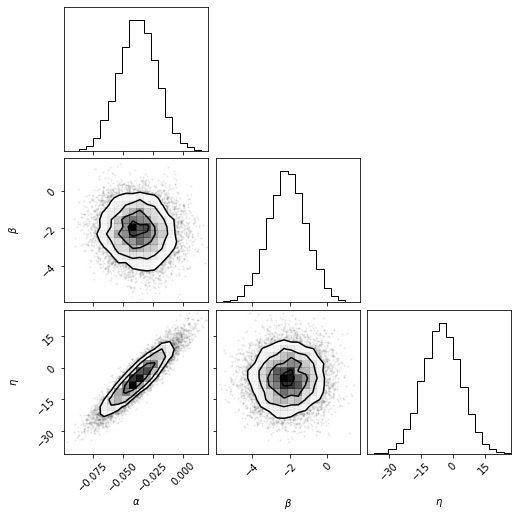

In [68]:
import corner
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
fig = corner.corner(
    flat_samples, labels=[r'$\alpha$',r'$\beta$',r'$\eta$'])

In [79]:
for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    #txt = txt.format(mcmc[1], q[0], q[1])#, labels[i])
    print ('{0:2.3f} {1:2.2f} {2:2.2f}'.format(mcmc[1], q[0], q[1]))
   # display(Math(txt))

-0.037 0.02 0.02
-2.118 1.01 1.01
-5.051 9.08 8.98


In [81]:
model([-0.037,-2.1,-5])

121.47743319908908